In [53]:

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind


In [8]:
pd.set_option('display.max_columns', None)
master = pd.read_csv('master_names_clean.csv')
master.head()

,Unnamed: 0,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,1st_road_class,1st_road_number,road_type,speed_limit,junction_control,2nd_road_class,2nd_road_number,crossguard,ped_crossway,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,road_hazard,urban_or_rural_area,did_police_officer_attend_scene_of_accident,coordinates,vehicle_type,trailer,vehicle_activity,vehicle_location-restricted_lane,vehicle_action,vehicle_loc_post_impact,impact_type,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_driver,age_bin_driver,propulsion,age_of_vehicle,socioeconomic_status,driver_residence,car_status,season
0,0,1,3,2,1,Monday,midnight,3,1,6,20,4.0,5.0,0.0,0.0,ped_light,1,clear,1.0,0.0,0,1,1,"(51.529746, -0.102474)",taxi,0.0,turn_left,0.0,none,on_road,front,1.0,work,1.0,40.0,7.0,8.0,6.0,low,city,poor,winter
1,1,1,2,2,1,Monday,late_night,4,167,3,30,2.0,3.0,124.0,0.0,ped_light,1,rain,0.0,0.0,0,1,1,"(51.530179, 0.037828)",car,0.0,turn_right,0.0,none,on_road,front,1.0,Unknown,1.0,27.0,6.0,1.0,1.0,middle,city,good,winter
2,2,1,2,2,1,Monday,early_morning,5,0,6,30,4.0,5.0,0.0,0.0,none,1,clear,1.0,0.0,0,1,1,"(51.514545, -0.199239)",taxi,0.0,exiting,0.0,none,on_road,front,1.0,work,1.0,66.0,10.0,2.0,5.0,low,city,poor,winter
3,3,1,3,3,1,Monday,early_morning,3,20,2,30,4.0,3.0,20.0,0.0,none,1,clear,1.0,0.0,0,1,1,"(51.475091, -0.032886)",taxi,0.0,driving,0.0,none,on_road,back,1.0,work,2.0,36.0,7.0,8.0,2.0,low,city,poor,winter
4,4,1,3,2,1,Monday,midnight,6,0,6,30,4.0,6.0,0.0,0.0,cross_walk,1,clear,1.0,0.0,0,1,1,"(51.56325, -0.311872)",car,0.0,turn_right,0.0,none,on_road,front,1.0,Unknown,1.0,24.0,5.0,1.0,9.0,low,city,okay,winter


In [120]:
master.columns

Index(['Unnamed: 0', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'time', '1st_road_class',
       '1st_road_number', 'road_type', 'speed_limit', 'junction_control',
       '2nd_road_class', '2nd_road_number', 'crossguard', 'ped_crossway',
       'light_conditions', 'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'road_hazard', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'coordinates',
       'vehicle_type', 'trailer', 'vehicle_activity',
       'vehicle_location-restricted_lane', 'vehicle_action',
       'vehicle_loc_post_impact', 'impact_type',
       'was_vehicle_left_hand_drive?', 'journey_purpose_of_driver',
       'sex_of_driver', 'age_driver', 'age_bin_driver', 'propulsion',
       'age_of_vehicle', 'socioeconomic_status', 'driver_residence',
       'car_status', 'season'],
      dtype='object')

In [6]:
data['vehicle_activity'].unique()

array(['turn_left', 'turn_right', 'exiting', 'driving', 'stopped',
       'passing_right', 'reversing', 'passing_left', 'change_lane_right',
       'u-turn', 'change_lane_left', 'parking'], dtype=object)

In [12]:
master['1st_road_class'].replace(2.0, 3, inplace=True)

In [15]:
master['2nd_road_class'].replace(2.0, 3, inplace=True)

In [16]:
master['2nd_road_class'].unique()

array([5., 3., 6., 4., 1.])

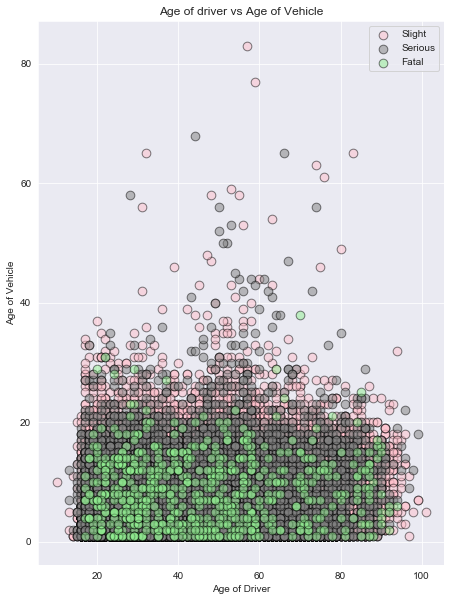

In [28]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax3 = fig.add_subplot(122)
ax3.scatter(x = master[master['accident_severity']==3].age_driver, y = master[master['accident_severity']==3].age_of_vehicle,
                        alpha = .50,edgecolor= 'black',  c = 'pink', s= 75, label = 'Slight')
ax3.scatter(x = master[master['accident_severity']==2].age_driver, y = master[master['accident_severity']==2].age_of_vehicle,
                        alpha = .50,edgecolors= 'black',  c = 'grey', s= 75, label = 'Serious')
ax3.scatter(x = master[master['accident_severity']==1].age_driver, y = master[master['accident_severity']==1].age_of_vehicle,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Fatal')
ax3.set_xlabel('Age of Driver')
ax3.set_ylabel('Age of Vehicle')
ax3.set_title('Age of driver vs Age of Vehicle')
ax3.legend()

plt.show()

3    55172
2    12109
1      620
Name: accident_severity, dtype: int64


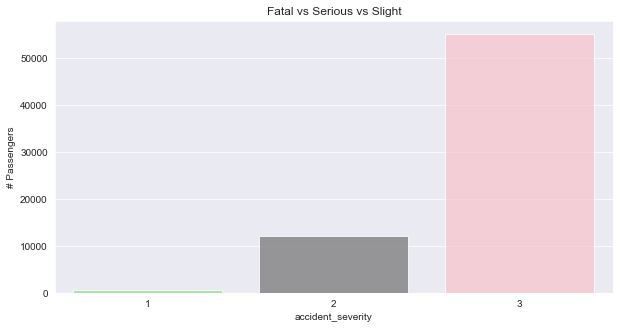

In [24]:
print(master.accident_severity.value_counts())

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(master['accident_severity'], alpha =.80, palette= ['lightgreen','grey','pink'])
plt.title('Fatal vs Serious vs Slight')
plt.ylabel('# Passengers')
plt.show()

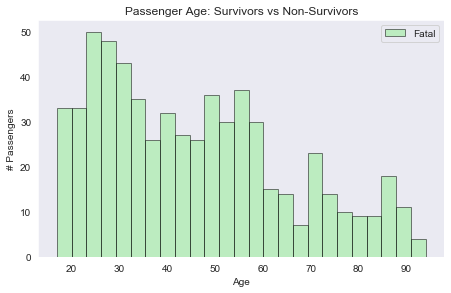

In [26]:
sns.set_style('dark')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(master[master['accident_severity'] ==1].age_driver, bins = 25, label ='Fatal', alpha = .50, edgecolor = 'black',color = 'lightgreen')
#ax1.hist(master[master['accident_severity']==2].age_of_driver, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')
plt.show()


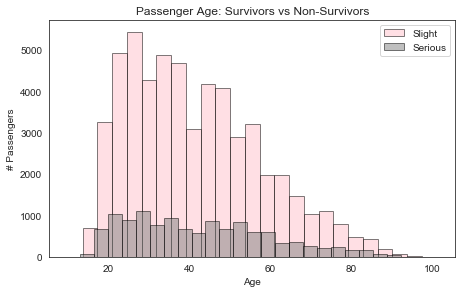

In [27]:
sns.set_style('white')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(master[master['accident_severity'] ==3].age_driver, bins = 25, label ='Slight', alpha = .50, edgecolor = 'black',color = 'pink')
ax1.hist(master[master['accident_severity']==2].age_driver, bins = 25, label = 'Serious', alpha = .50, edgecolor = 'black',color = 'grey')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')
plt.show()


In [48]:
# sns.set_style('white')
# fig = plt.figure(figsize = (16,10))
# fig.subplots_adjust(hspace = .30)

# ax1 = fig.add_subplot(221)
# ax1.hist(master[master['accident_severity'] ==3].speed_limit, bins = 25, label ='Slight', alpha = .50, edgecolor = 'black',color = 'pink')
# ax1.hist(master[master['accident_severity']==2].speed_limit, bins = 25, label = 'Serious', alpha = .50, edgecolor = 'black',color = 'grey')
# ax1.hist(master[master['accident_severity']==1].speed_limit, bins = 25, label = 'Serious', alpha = .50, edgecolor = 'black',color = 'lightgreen')
# ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
# ax1.set_xlabel('Age')
# ax1.set_ylabel('# Passengers')
# ax1.legend(loc = 'upper right')
# plt.show()


In [42]:
speed = master.groupby(['speed_limit','accident_severity']).size().unstack()
#speed.reset_index(inplace=True)
speed

accident_severity,1,2,3
speed_limit,,,
20,15,861,4015
30,286,7408,36440
40,67,1325,5589
50,56,566,2255
60,148,1586,5026
70,48,363,1847


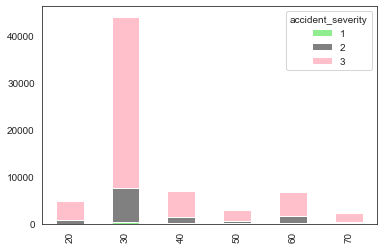

In [47]:
speed.index=['20','30','40','50','60','70']
speed.plot(kind='bar',stacked=True, colors= ['lightgreen','grey','pink'])

In [49]:
light = master.groupby(['light_conditions','accident_severity']).size().unstack()
light

accident_severity,1,2,3
light_conditions,,,
0,419,8649,41043
1,201,3460,14129


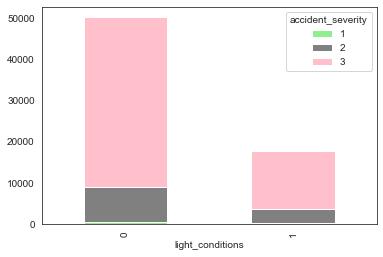

In [51]:
light.plot(kind='bar',stacked=True, colors= ['lightgreen','grey','pink'])

In [81]:
lightt= master.groupby(['light_conditions']).size()
lightt

light_conditions
0    50111
1    17790
dtype: int64

In [121]:
light22 = master[['light_conditions','number_of_casualties']]
light22

,light_conditions,number_of_casualties
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
67896,1,4
67897,0,3
67898,0,1
67899,1,1


In [122]:
morelight= light22.groupby('light_conditions')
organizedlight=morelight.count()

In [123]:
organizedlight

,number_of_casualties
light_conditions,
0,50111
1,17790


In [124]:
organizedlight.reset_index(inplace=True)

In [127]:
organizedlight.loc[0]

light_conditions            0
number_of_casualties    50111
Name: 0, dtype: int64

In [130]:
#ha: there is statistical difference between light conditions and accidents
#ho: there is no statistical difference between light conditions and accidents


light = organizedlight.loc[0]
dark = organizedlight.loc[1]

statistic, pvalue = ttest_ind(light ,dark, equal_var= False,)
alpha = 0.05

print("Pvalue:", float(pvalue)) 
print("Tstat:", float(statistic)) 
if pvalue < alpha:
    print("Null hypothesis rejected, there is a statistical significance between light conditions and accidents ")
else:
    print("Fail to reject null hypothesis there is no statistical significance between light conditions and accidents  ")

Pvalue: 0.6351223877068274
Tstat: 0.6078065456149325
Fail to reject null hypothesis there is no statistical significance between light conditions and accidents  
